# Grassmann Manifold

Author: Ketson R. M. dos Santos,  
Date: March 24, 2020   

This example shows how to use the UQpy Grassmann class to
* project points onto the Grassmann manifold;
* calculate the pairwise distances;
* compute the affinity matrix.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the Grassmann class from UQpy implemented in the DimensionReduction module.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from DimensionReduction import Grassmann
from Utilities import svd

Generate the initial samples located at the vertices of a triangle. The coordinates of each vertix are stored in `nodes`.

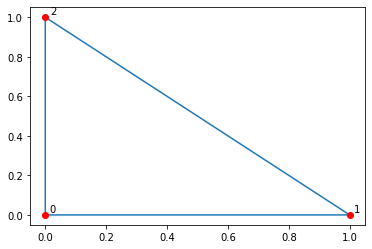

In [2]:
nodes = np.array([[0, 0], [1, 0], [0, 1]]) # node_0, node_1, node_2.

plot_ = nodes[0:]
Xplot = plot_.T[0].tolist()
Xplot.append(plot_[0][0])
Yplot = plot_.T[1].tolist()
Yplot.append(plot_[0][1])
plt.plot(Xplot,Yplot)
plt.plot(nodes[0][0],nodes[0][1],'ro')
plt.plot(nodes[1][0],nodes[1][1],'ro')
plt.plot(nodes[2][0],nodes[2][1],'ro')

dt = 0.015
plt.text(nodes[0][0]+dt,nodes[0][1]+dt,'0')
plt.text(nodes[1][0]+dt,nodes[1][1]+dt,'1')
plt.text(nodes[2][0]+dt,nodes[2][1]+dt,'2')
plt.show()
plt.close()



Generate three random matrices with reduced rank corresponding to the different samples. The samples are stored in `Solutions`.

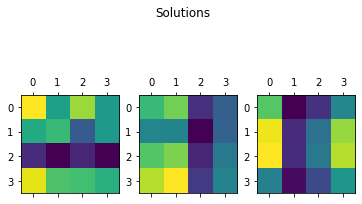

In [3]:

D1 = 4 
r0 = 2  # rank sample 0
r1 = 2  # rank sample 1
r2 = 2  # rank sample 2

np.random.seed(1111) # For reproducibility.
# Solutions: original space.
Sol0 = np.dot(np.random.rand(D1, r0),np.random.rand(r0, D1))
Sol1 = np.dot(np.random.rand(D1, r1),np.random.rand(r1, D1))
Sol2 = np.dot(np.random.rand(D1, r2),np.random.rand(r2, D1))

# Creating a list of solutions.
Solutions = [Sol0, Sol1, Sol2]

# Plot the solutions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Solutions')
ax1.matshow(Sol0)
ax2.matshow(Sol1)
ax3.matshow(Sol2)
plt.show()

Instatiate the UQpy class Grassmann considering the `"grassmann_distance"` as the a definition of distance on the manifold. Further, the method `project_points` is employed to project the solution on the Grassmann manifold where the left and right -singular vectors and the singular values are computed. Moreover, also the rank of each solution as the maximum rank among all the solutions are provided.

In [4]:
# Project each point onto the Grassmann manifold and estimate the ranks.
Gr = Grassmann(distance_object="grassmann_distance",kernel_object="projection_kernel")

psi_, sigma_, phi_, max_rank_, rank_ = Gr.project_points(Solutions)
phi_ = np.array([phi_[0].T, phi_[1].T, phi_[2].T]) # Taking the transpose.

The pairwise distances are estimated. In this regard, the distances are computed for the nodes 0 and 1, 0 and 2, and 1 and 2, respectively. 

In [5]:
Distances = Gr.distance(psi_)

print(Distances)

[2.317789520677502, 2.5564740572879026, 2.642634229878192]


Compute the affinity matrix using the method `kernel` using the projection kernel via `kernel_object = "projection_kernel"`.

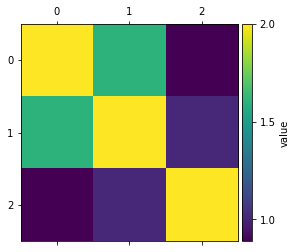

In [6]:
Kernel_matrix = Gr.kernel(psi_)

# Plot the solutions
fig, ax1 = plt.subplots(1, 1)
im=ax1.matshow(Kernel_matrix)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax, ticks=[0, 0.5, 1, 1.5, 2], label='value')
plt.show()